In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Insurance Fraund Detection/insuranceFraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
print(df.policy_state.unique())
print(df.policy_csl.unique())
print(df.insured_education_level.unique())
print(df.insured_relationship.unique())
print(df.insured_hobbies.unique())
print(df.incident_type.unique())
print(df.collision_type.unique())
print(df.incident_severity.unique())
print(df.authorities_contacted.unique())
print(df.incident_state.unique())
print(df.incident_city.unique())
print(df.police_report_available.unique())
print(df.auto_make.unique())



['OH' 'IN' 'IL']
['250/500' '100/300' '500/1000']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' '?' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['Police' 'None' 'Fire' 'Other' 'Ambulance']
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
['YES' '?' 'NO']
['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']


**We have ? as Nan character, So first we replace ? with Nan then we will handle missing values**

In [ ]:
df = df.replace('?', np.nan)

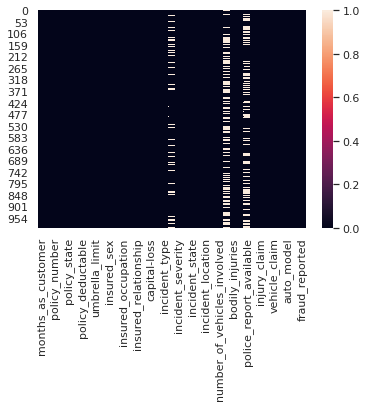

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [ ]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [ ]:
df.property_damage.value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
df.police_report_available.value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

#Feature Engineering

**Handling Missing values**

In [ ]:
# Collision type
df["collision_type"] = df["collision_type"].fillna('Other')
# police report availablity
df["police_report_available"] = df["police_report_available"].fillna('unknown')
# property damage
df["property_damage"] = df["property_damage"].fillna('unknown')

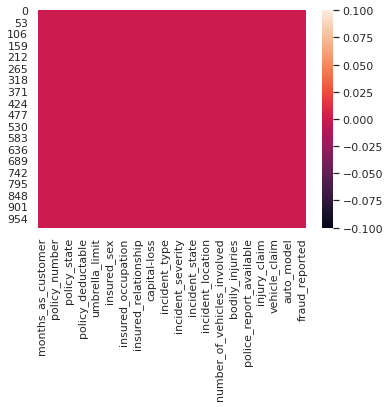

In [ ]:
sns.heatmap(df.isnull())

**Handling Categorical Variable**

In [ ]:
df["fraud_reported"] = pd.Series(np.where(df.fraud_reported.values == 'Y', 1, 0), df.fraud_reported.index)

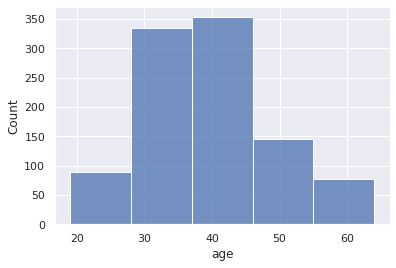

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.histplot(x="age", data=df, bins=5)

In [ ]:
def convertAgesToCategories(age):
  if age < 25:
    age_type = "<25"
  elif age >= 25 and age <=40:
    age_type = "25-40"
  elif age > 40 and age <= 50:
    age_type = "40-50"
  else:
    age_type = ">50"
  return age_type

In [ ]:
df['age_cat'] = df['age'].apply(convertAgesToCategories)
df.drop('age', axis=1, inplace=True)

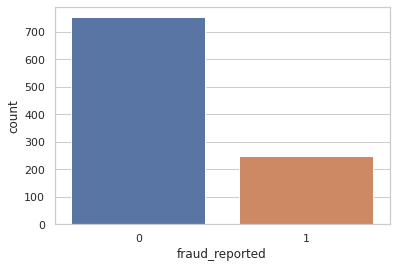

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',data=df)

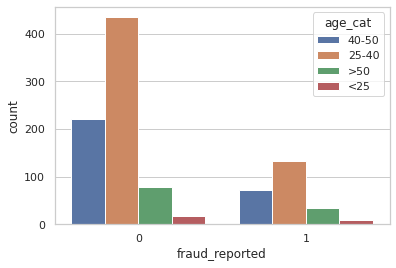

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported', hue='age_cat', data=df)

**Convert Date columns to Date type object**

In [ ]:
df["incident_date"] = pd.to_datetime(df["incident_date"])
df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])

In [ ]:
df["incident_month"] = df["incident_date"].dt.month
df["incident_year"] = df["incident_date"].dt.year

df["policy_bind_month"] = df["policy_bind_date"].dt.month
df["policy_bind_year"] = df["policy_bind_date"].dt.year

df.drop('incident_date', axis=1, inplace=True)
df.drop('policy_bind_date', axis=1, inplace=True)

In [ ]:
# dropping policy number
df.drop('policy_number', axis=1, inplace=True)

In [ ]:
# Dropping Hobbies
df.drop('insured_hobbies', axis=1, inplace=True)

In [ ]:
# Dropping location
df.drop('incident_location', axis=1, inplace=True)

In [ ]:
# Dropping auto_make, auto_model
df.drop('auto_model', axis=1, inplace=True)
df.drop('auto_make', axis=1, inplace=True)

In [ ]:
df.drop('insured_zip', axis=1, inplace=True)

In [ ]:
def convertFractionToFloat(obj):
  temp_arr = obj.split('/')
  num = int(temp_arr[0])
  den = int(temp_arr[1])
  return num/den

In [ ]:
# convert policy csl fraction objects to float
df["policy_csl"] = df["policy_csl"].apply(convertFractionToFloat)

In [ ]:
# Handling Umbrella_limit
# dropping row with value -100000; it has index: 290
df = df.drop(df.index[290])

In [ ]:
# Ordinal Label encoding of Umbrella Limit
def categorizeUmbrellaLimit(obj):
  if obj <= 2000000:
    return 1
  elif obj <= 3000000:
    return 2
  elif obj <= 4000000:
    return 3
  elif obj <= 5000000:
    return 4
  elif obj <= 6000000:
    return 5
  elif obj <= 7000000:
    return 6
  elif obj <= 8000000:
    return 7
  elif obj <= 9000000:
    return 8
  elif obj <= 10000000:
    return 9
  else:
    return 10

df["umbrella_limit"] = df["umbrella_limit"].apply(categorizeUmbrellaLimit)

In [ ]:
# Ordinal Label Encoding of Education level
def categorizeEducation(obj):
  if obj == 'High School':
    return 1
  elif obj == 'College':
    return 2
  elif obj == 'JD' or obj == 'Masters' or obj == 'MD' or obj == 'Associate':
    return 3
  elif obj == 'PhD':
    return 4

df["insured_education_level"] = df["insured_education_level"].apply(categorizeEducation)

In [ ]:
df["insured_occupation"].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

**One hot Encoding**

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=['policy_state', 'insured_sex', 'insured_relationship', 'incident_type', 
                                     'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                                     'incident_city', 'property_damage', 'police_report_available', 'age_cat', 'insured_occupation'] )

In [ ]:
dum_df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,incident_month,incident_year,policy_bind_month,policy_bind_year,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Other,collision_type_Rear Collision,...,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,property_damage_unknown,police_report_available_NO,police_report_available_YES,police_report_available_unknown,age_cat_25-40,age_cat_40-50,age_cat_<25,age_cat_>50,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
0,328,0.500000,1000,1406.91,1,3,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,1,2015,10,2014,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,228,0.500000,2000,1197.22,4,3,0,0,8,1,0,0,5070,780,780,3510,2007,1,1,2015,6,2006,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,134,0.333333,2000,1413.14,4,4,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,2,2015,9,2000,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,256,0.500000,2000,1415.74,5,4,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,1,2015,5,1990,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,228,0.500000,1000,1583.91,5,3,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,2,2015,6,2014,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
dum_df.shape

(999, 88)

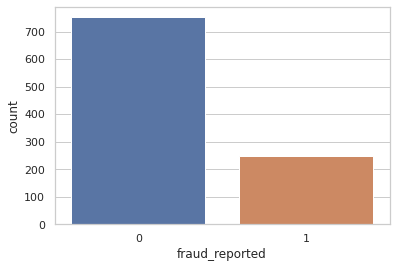

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='fraud_reported',data=dum_df)